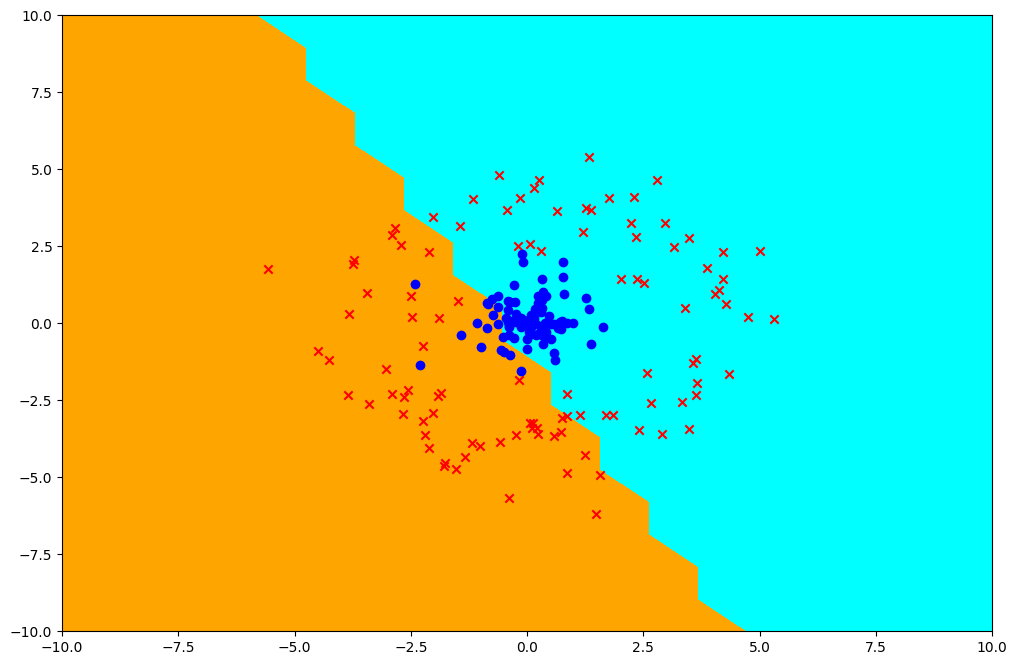

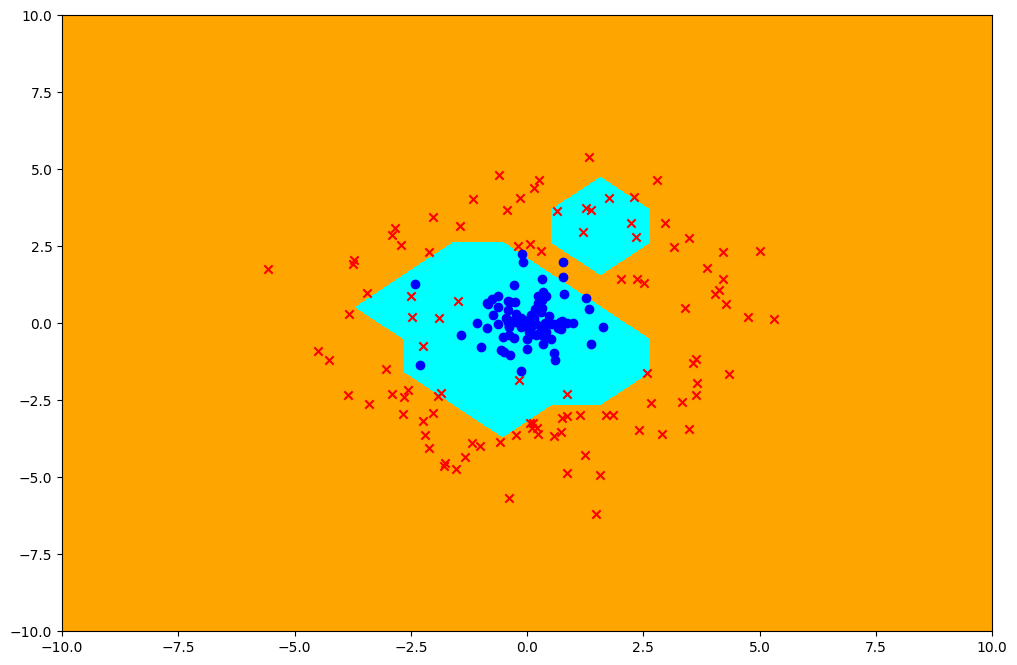

In [21]:
import math
import matplotlib.pyplot as plt
import numpy as np

import util


def initial_state():
    """Return the initial state for the perceptron.

    This function computes and then returns the initial state of the perceptron.
    Feel free to use any data type (dicts, lists, tuples, or custom classes) to
    contain the state of the perceptron.
    """
    a_lst = []
    y_lst = []
    x_lst = []
    return a_lst, y_lst, x_lst 



def predict(state, kernel, x_i):
    """Peform a prediction on a given instance x_i given the current state
    and the kernel.

    Args:
        state: The state returned from initial_state() (a_lst, y_list, x_lst)
        kernel: A binary function that takes two vectors as input and returns
            the result of a kernel
        x_i: A vector containing the features for a single instance
    
    Returns:
        Returns the prediction (i.e 0 or 1)
    """
    sum_weights = 0
    a_lst, y_lst, x_lst = state 

    for i in range(len(a_lst)):
        sum_weights += (a_lst[i] * y_lst[i] * kernel(x_lst[i], x_i))
    return sign(sum_weights)


def update_state(state, kernel, learning_rate, x_i, y_i):
    """Updates the state of the perceptron.

    Args:
        state: The state returned from initial_state()
        kernel: A binary function that takes two vectors as input and returns the result of a kernel
        learning_rate: The learning rate for the update
        x_i: A vector containing the features for a single instance
        y_i: A 0 or 1 indicating the label for a single instance
    """
    # predict to see if its worth adding 
    if predict(state, kernel, x_i) != y_i:
        # add to the state 
        a_lst, y_lst, x_lst = state 
        a_lst.append(learning_rate)
        if y_i == 0:
            y_lst.append(-learning_rate)
        else:
            y_lst.append(learning_rate)
        x_lst.append(x_i)
        state = (a_lst, y_lst, x_lst)
    return state 



def sign(a):
    """Gets the sign of a scalar input."""
    if a >= 0:
        return 1
    else:
        return 0


def dot_kernel(a, b):
    """An implementation of a dot product kernel.

    Args:
        a: A vector
        b: A vector
    """
    return np.dot(a, b)


def rbf_kernel(a, b, sigma=1):
    """An implementation of the radial basis function kernel.

    Args:
        a: A vector
        b: A vector
        sigma: The radius of the kernel
    """
    distance = (a - b).dot(a - b)
    scaled_distance = -distance / (2 * (sigma) ** 2)
    return math.exp(scaled_distance)


def train_perceptron(kernel_name, kernel, learning_rate):
    """Train a perceptron with the given kernel.

    This function trains a perceptron with a given kernel and then
    uses that perceptron to make predictions.
    The output predictions are saved to src/output/p05_{kernel_name}_predictions.txt.
    The output plots are saved to src/output_{kernel_name}_output.pdf.

    Args:
        kernel_name: The name of the kernel.
        kernel: The kernel function.
        learning_rate: The learning rate for training.
    """
    train_x, train_y = util.load_csv('../data/ds5_train.csv')

    state = initial_state()

    for x_i, y_i in zip(train_x, train_y):
        state = update_state(state, kernel, learning_rate, x_i, y_i)

    test_x, test_y = util.load_csv('../data/ds5_test.csv')

    plt.figure(figsize=(12, 8))
    util.plot_contour(lambda a: predict(state, kernel, a))
    util.plot_points(test_x, test_y)
    plt.savefig('../output/p05_{}_output.pdf'.format(kernel_name))

    predict_y = [predict(state, kernel, test_x[i, :]) for i in range(test_y.shape[0])]

    np.savetxt('../output/p05_{}_predictions'.format(kernel_name), predict_y)


def main():
    train_perceptron('dot', dot_kernel, 0.5)
    train_perceptron('rbf', rbf_kernel, 0.5)


if __name__ == "__main__":
    main()